In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(rc={'figure.figsize':(20,18)})
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/ecommerce.csv')
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df.head()

,InvoiceNo,UnitPrice,OrderValue,Quantit,Country,InvoiceDate,InvoiceTime,Year-Month,Major Category,Minor Category,Description
0,549185,0.85,10.20,12,United Kingdom,7/4/11,09:35,2011-04,Clothes,Tops,PACK OF 20 NAPKINS PANTRY DESIGN
1,576381,2.95,35.40,12,United Kingdom,15/11/11,09:26,2011-11,Clothes,Shoes,NATURAL SLATE HEART CHALKBOARD
2,551192,1.25,20.00,16,United Kingdom,27/4/11,10:54,2011-04,Kitchen,Cutlery,36 PENCILS TUBE SKULLS
3,573553,7.46,7.46,1,United Kingdom,31/10/11,13:48,2011-10,Garden,Turf,SET 6 SCHOOL MILK BOTTLES IN CRATE
4,539436,2.51,2.51,1,United Kingdom,17/12/10,14:49,2010-12,Garden,Hoses,FINE WICKER HEART


## Create at least 10 charts to help you analyze the data, it should reflects all kind of analysis (e.g.: univariate, bivariate,...etc.)
note: you will need to clean data!

In [ ]:
df[' InvoiceDate'] = pd.to_datetime(df[" InvoiceDate"], infer_datetime_format=True)

In [ ]:
def clean_dataset(df):
    df1 = df[df['UnitPrice'] <= 50 ]
    df2 = df1[df1['Quantit'] <= 30]
    return df2
df = clean_dataset(df)

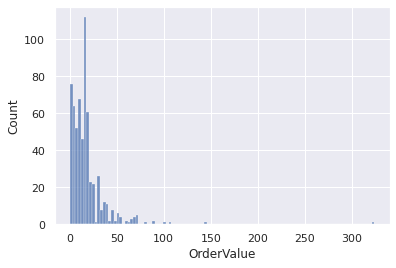

In [ ]:
sns.histplot(df['OrderValue']);

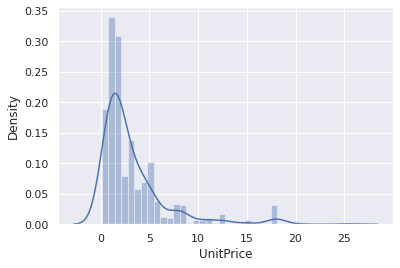

In [ ]:
sns.distplot(df['UnitPrice']);

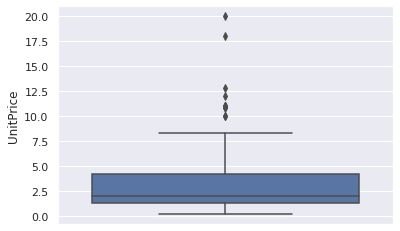

In [ ]:
clothes_price = df[df['Major Category'] == 'Clothes']
sns.boxplot(data = clothes_price, y = 'UnitPrice');

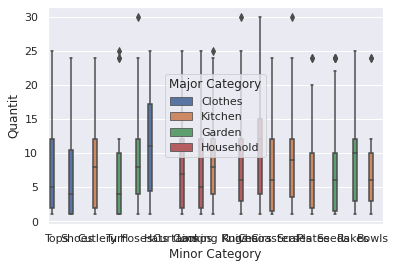

In [ ]:
sns.boxplot(data = df, x = 'Minor Category', y = 'Quantit', hue = 'Major Category');  

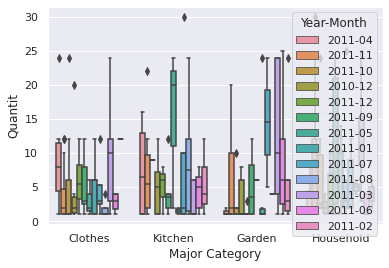

In [ ]:
b = df[df['Country'] == 'United Kingdom']
sns.boxplot(data = b, x = 'Major Category', y = 'Quantit', hue = 'Year-Month');  

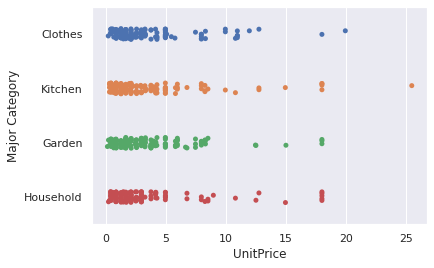

In [ ]:
sns.stripplot(data = df, x = 'UnitPrice', y = 'Major Category');

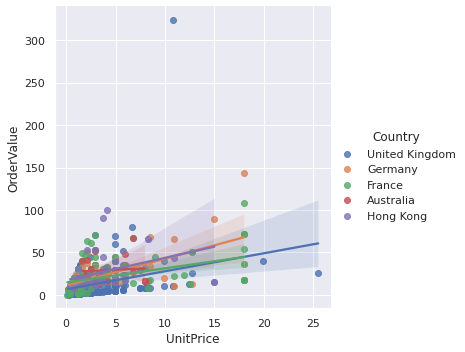

In [ ]:
sns.lmplot(
    data=df,
    x="UnitPrice", y="OrderValue", hue="Country"
)

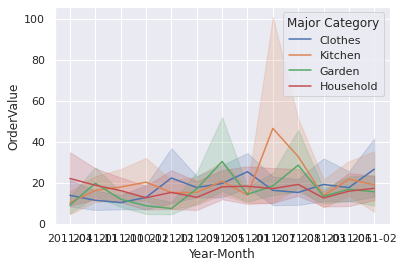

In [ ]:
sns.lineplot(x="Year-Month", y="OrderValue",
             hue="Major Category", data=df)

In [ ]:
df['hour'] = pd.to_datetime(df['InvoiceTime'], format='%H:%M').dt.hour

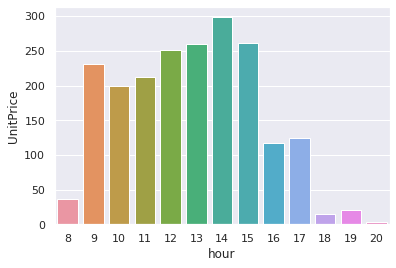

In [ ]:
hour = df.groupby(['hour'])['UnitPrice'].sum()
hourg = pd.DataFrame(hour).reset_index()
sns.barplot(data = hourg, x ='hour', y ='UnitPrice' )

In [ ]:
df.head(1)

,InvoiceNo,UnitPrice,OrderValue,Quantit,Country,InvoiceDate,InvoiceTime,Year-Month,Major Category,Minor Category,Description,hour
0,549185,0.85,10.2,12,United Kingdom,2011-07-04,09:35,2011-04,Clothes,Tops,PACK OF 20 NAPKINS PANTRY DESIGN,9


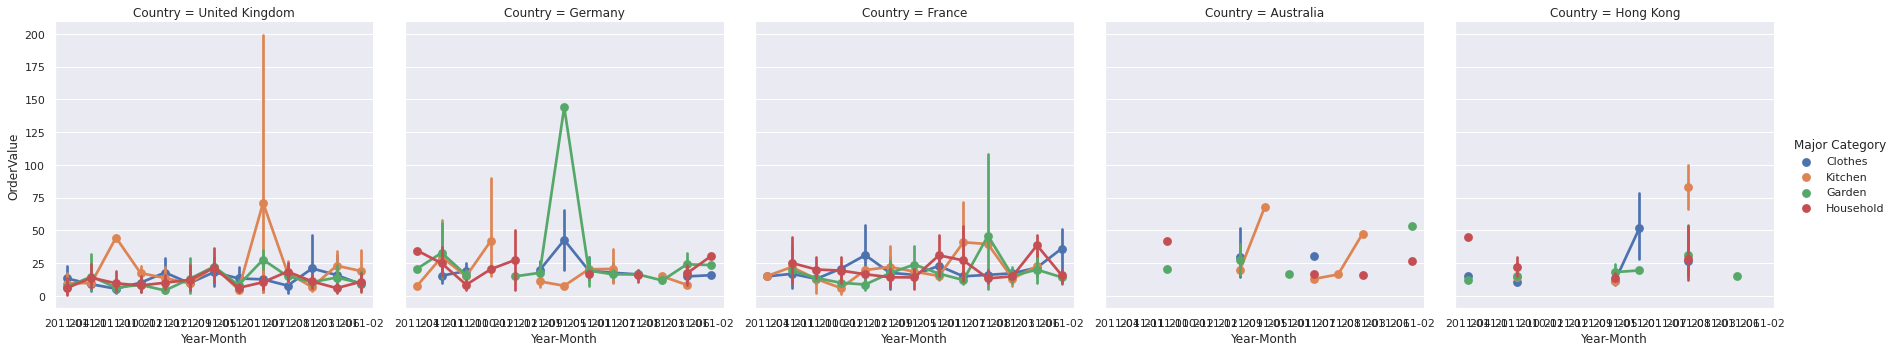

In [ ]:
sns.catplot(x="Year-Month", y="OrderValue", hue="Major Category", col="Country", kind="point", data=df)